In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/2 BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [1]:
# =================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path

home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

C:\Users\steve.jamieson\git\IntrotoNeural_Networks
C:\Users\steve.jamieson\git\IntrotoNeural_Networks/data


In [2]:
from pathlib import Path
data_dir = Path.cwd().parent.parent / "data"

In [3]:
data_dir.exists()

True

In [4]:
# =================================================-
#### Slide 6: Loading packages  ####

# Helper packages.
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from textwrap import wrap

# Scikit-learn package for building a perceptron.
from sklearn.neural_network import MLPClassifier

# Scikit-learn package for data preprocessing.
from sklearn.preprocessing import MinMaxScaler

# Model set up, tuning and model metrics packages.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [28]:
# =================================================-
#### Slide 7: Load the data  ####

from pathlib import Path
data_dir = Path.cwd().parent.parent / "data"
credit_card = pd.read_csv(data_dir / "credit_card_data.csv")

# this can be used for a datasource - 
# credit_card = pd.read_csv("https://raw.githubusercontent.com/reddogTwin/IntrotoNeural_Networks/main/data/credit_card_data.csv")
#
#

credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# =================================================-
#### Slide 9: Data at first glance  ####

# The data types.
credit_card.dtypes

ID                              int64
LIMIT_BAL                       int64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default_payment_next_month      int64
dtype: object

In [7]:
# =================================================-
#### Slide 10: Check for NAs in the dataset  ####

# Check for NAs.
credit_card.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     1
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [8]:
# =================================================-
#### Slide 11: Using fillna() to handle missing values  ####

# Fill missing values with mean
credit_card = credit_card.fillna(credit_card.mean())
# Check for NAs in 'BILL_AMT1'.

In [9]:
credit_card.isna().sum()["BILL_AMT1"]

0

In [10]:
# Drop an unnecessary identifier column.
credit_card = credit_card.set_index("ID")
credit_card

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [11]:
# =================================================-
#### Slide 15: Transform and replace categorical variables  ####

# Convert 'sex' into dummy variables.
credit_card = pd.get_dummies(
    credit_card,
    columns=["SEX", "EDUCATION", "MARRIAGE"],
    drop_first=True,
)

In [12]:
credit_card.loc[:,credit_card.columns.str.startswith("SEX")]

,SEX_2
ID,
1,True
2,True
3,True
4,True
5,False
...,...
29996,False
29997,False
29998,False


In [13]:
credit_card.loc[:,credit_card.columns.str.startswith("SEX")].value_counts()

SEX_2
True     18112
False    11888
Name: count, dtype: int64

In [15]:
credit_card.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913.0,3102,...,True,False,True,False,False,False,False,True,False,False
2,120000,26,-1,2,0,0,0,2,2682.0,1725,...,True,False,True,False,False,False,False,False,True,False
3,90000,34,0,0,0,0,0,0,29239.0,14027,...,True,False,True,False,False,False,False,False,True,False
4,50000,37,0,0,0,0,0,0,46990.0,48233,...,True,False,True,False,False,False,False,True,False,False
5,50000,57,-1,0,-1,0,0,0,8617.0,5670,...,False,False,True,False,False,False,False,True,False,False


In [16]:

# Separate predictors from data.
X = credit_card.drop(["default_payment_next_month"], axis=1)

In [17]:
# =================================================-
#### Slide 16: Data prep: split  ####


# We do this so we can always have a data set to test against 
# this is the standard and always has to be done on data in Machine Learning 
# Shift TAB - look at documentation in JP
#
# its random and reproducable 
#
#
#


# random_state=1
# 42 - a known random number ?

# Separate target from data.
y = credit_card["default_payment_next_month"]
# Split data into train and test set, use a 70 - 30 split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (21000, 30) Test shape: (9000, 30)


In [18]:
ord("*")

42

In [17]:
!ls *

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
# =================================================-
#### Slide 17: Data prep: scale with MinMaxScaler  ####

# Transforms each feature to a given range.
# The default is the range between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()


# we learn from the training set 
# and we apply that to the test set 
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [20]:
# =================================================-
#### Slide 2: Build the model architecture  ####


# look at documentation of MLPClassifer to see whats included 
#
# Build neural network model
nn = MLPClassifier(
    hidden_layer_sizes=(64),random_state=1, solver="adam", max_iter=2000)  

# using a solver better for smaller data 
# adjusting the iterations 

In [ ]:

#SHIFT TAB - for pop up documentation 

In [21]:
# =================================================-
#### Slide 3: Fit the model to training data  ####

# Fit the saved model to your training data.
nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=64, max_iter=2000, random_state=1)

In [22]:
import sklearn

In [24]:
sklearn.__version__

'1.3.0'

In [25]:
# =================================================-
#### Slide 4: Inspect accuracy of training model  ####

# Compute accuracy using training data.
acc_train_nn = nn.score(X_train_scaled, y_train)
print("Train Accuracy:", acc_train_nn)

Train Accuracy: 0.8263333333333334


In [32]:
y.value_counts()

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64

In [33]:
# checking to see what is there 
y.value_counts(normalize=True)

default_payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [81]:
# =================================================-
#### Slide 10: Predict on test data  ####

# Predict on test data.
predicted_values_nn = nn.predict(X_test_scaled)
print(predicted_values_nn)

# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values_nn)
print("Accuracy on test data: ", test_accuracy_score)

[0 0 0 ... 0 0 0]
Accuracy on test data:  0.8144444444444444


In [82]:
# =================================================-
#### Slide 11: Confusion matrix   ####

# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values_nn)
print(conf_matrix_test)

[[6651  389]
 [1281  679]]


In [ ]:
####  Confusion matrix   ####

## pattern recgnoition 
## 2x2 table 
## machine learning = confusion matrix 
## stats
## a way of looking at performance 

#creating a Nice(martin) Confusion Matrix 
#
#
#






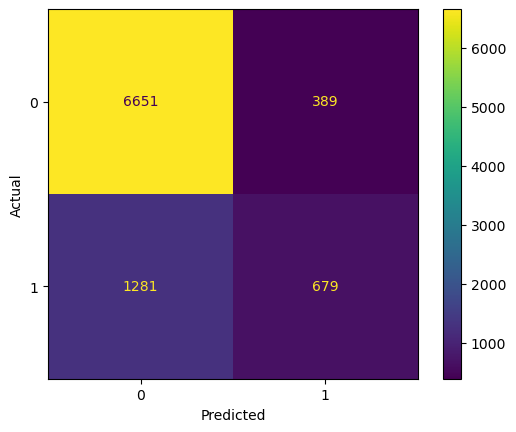

In [42]:
####  Confusion matrix   ####

## pattern recgnoition 
## 2x2 table 
## machine learning = confusion matrix 
## stats
## a way of looking at performance 

#creating a Nice(martin) Confusion Matrix 
#
#
#

#

from sklearn import metrics
cmd = metrics.ConfusionMatrixDisplay.from_estimator(nn, X_test_scaled, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual");


In [41]:
cmd.confusion_matrix

array([[6651,  389],
       [1281,  679]], dtype=int64)

In [50]:
##
recall = tp /cmd.confusion_matrix.sum(axis=1)[1]
recall = tp/ (tp+ fn) 
recall

0.3464285714285714

In [53]:
precision = tp /cmd.confusion_matrix.sum(axis=0)[1]
precision = tp / (tp + fp) 
precision

0.6357677902621723

In [54]:
tpr = recall 

In [55]:
fnr = 1 -recall
fnr 

0.6535714285714286

In [64]:
tnr = tn /conf_matrix_test.sum(axis=1)[0]
tnr = tn / (tn + fp) 
tnr 

0.9447443181818181

In [65]:
precision = tp /conf_matrix_test.sum(axis=0)[1]
precision = tp / (tp + fp) 
precision

0.6357677902621723

In [58]:
ppv = precision 
ppv 

0.6357677902621723

In [66]:
npv = tn /conf_matrix_test.sum(axis=0)[1]
npv = tn / (tn + fn) 
npv

0.8385022692889561

In [62]:
npv = tn / conf_matrix_test.sum(axis=0)[1]
npv = tn / (tn + fn) 
npv

0.8385022692889561

In [43]:
##
((tn,fp),(fn,tp)) = cmd.confusion_matrix

In [79]:
tp

679

In [80]:
tn

6651

In [44]:
fn

1281

In [35]:
# =================================================-
#### Slide 19: Classification report  ####

# Create a list of target names to interpret class assignments.
target_names = ["default_payment_0", "default_payment_1"]
# Print an entire classification report.
class_report = metrics.classification_report(
    y_test, predicted_values_nn, target_names=target_names
)
print(class_report)

                   precision    recall  f1-score   support

default_payment_0       0.84      0.94      0.89      7040
default_payment_1       0.64      0.35      0.45      1960

         accuracy                           0.81      9000
        macro avg       0.74      0.65      0.67      9000
     weighted avg       0.79      0.81      0.79      9000



In [68]:
# =================================================-
#### Slide 22: Getting probabilities instead of class labels  ####

# Get probabilities instead of predicted values.
test_probabilities = nn.predict_proba(X_test_scaled)

# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]

In [69]:
# =================================================-
#### Slide 23: Computing FPR, TPR, and threshold  ####

# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(
    y_test, test_predictions  # <- test data labels
)  # <- predicted probabilities
print("False positive: ", fpr)
print("True positive: ", tpr)
print("Threshold: ", threshold)

False positive:  [0.         0.         0.         ... 0.99971591 0.99971591 1.        ]
True positive:  [0.00000000e+00 5.10204082e-04 1.53061224e-03 ... 9.99489796e-01
 1.00000000e+00 1.00000000e+00]
Threshold:  [       inf 0.94504798 0.92940646 ... 0.00179557 0.00172456 0.00164535]


In [70]:
# =================================================-
#### Slide 24: Computing AUC  ####

# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

Area under the ROC curve:  0.7658806093460112


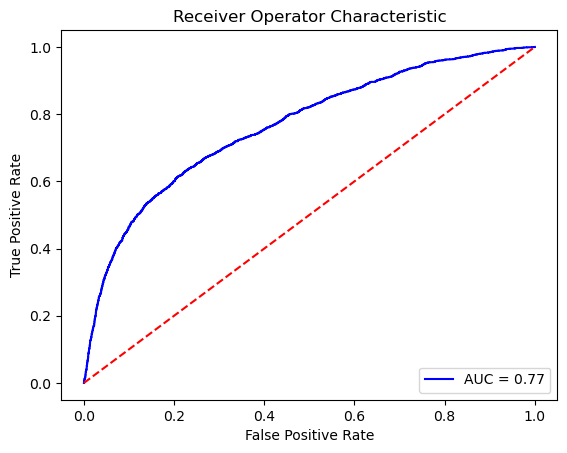

In [71]:
# =================================================-
#### Slide 25: Putting it all together: ROC plot  ####

# Make an ROC curve plot.
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

0.7658806093460112

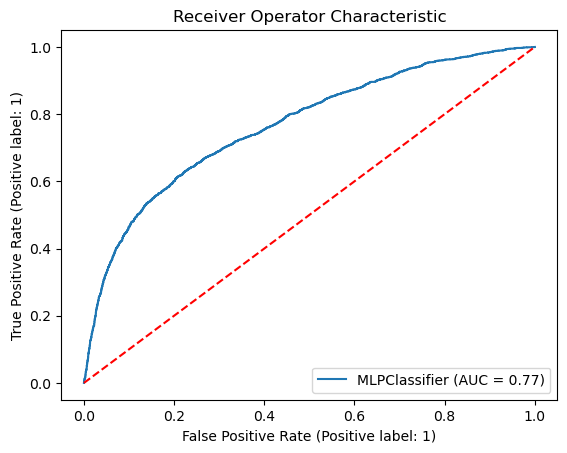

In [76]:
# =================================================-
#### Slide 26: Putting it all together: ROC plot (cont'd)  ####
# VERSION 2 of making a ROC plot - newer way
# Make an ROC curve plot.
#modified way of making a ROC curve 


rcd = metrics.RocCurveDisplay.from_estimator(nn, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.title("Receiver Operator Characteristic")
rcd.roc_auc



#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [ ]:
# =================================================-
#### Slide 12: Fitting & visualizing training history: accuracy   ####

N_EPOCHS = 25  # <- number of epochs
N_CLASSES = np.unique(y_train)  # <- number of classes in the target variable

# Build neural network model by creating a classifier:
# add the number of hidden neurons in the 1st hidden layer and set random state.
mlp = MLPClassifier(hidden_layer_sizes=(64), random_state=1)

scores_train = []  # <- we will store scores for training history here
scores_test = []  # <- we will store scores for testing history here

epoch = 0  # <- set epoch count
while epoch < N_EPOCHS:
    mlp_fit = mlp.partial_fit(X_train_scaled, y_train, classes=N_CLASSES)

    # Compute score for train data.
    scores_train.append(mlp.score(X_train_scaled, y_train))

    # Compute score for test data.
    scores_test.append(mlp.score(X_test_scaled, y_test))
    epoch += 1  # <- increment the epoch

In [ ]:
# =================================================-
#### Slide 13: Inspect model accuracy and loss  ####

plt.plot(scores_train, color="green", alpha=0.8, label="Train")
plt.plot(scores_test, color="magenta", alpha=0.8, label="Test")
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel("Epochs")
plt.legend(loc="upper left")
plt.show()
plt.plot(mlp.loss_curve_)
plt.title("Loss over epochs", fontsize=14)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [ ]:
# =================================================-
#### Slide 14: Inspect model accuracy and loss (cont'd)  ####

plt.plot(scores_train, color="green", alpha=0.8, label="Train")
plt.plot(scores_test, color="magenta", alpha=0.8, label="Test")
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel("Epochs")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# =================================================-
#### Slide 17: Class-imbalanced dataset challenges  ####

print(credit_card["default_payment_next_month"].value_counts())

In [ ]:
# =================================================-
#### Slide 20: Balancing target with SMOTE (cont'd)  ####

from imblearn.over_sampling import SMOTE

# Let's initialize SMOTE object.
smote = SMOTE()

# We can now fit the sampling method to our train data and labels.
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
print(y_train_sm.value_counts())

In [ ]:
# =================================================-
#### Slide 23: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################